<a href="https://colab.research.google.com/github/dtg-ca/DataScience-the-journey-begins/blob/master/NLP_tf_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [2]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

In [3]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
data.data.shape

(569, 30)

In [5]:
data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [6]:
data['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [7]:
data['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.33)

N, D = X_train.shape

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(1, input_shape = (D,),activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

r = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100)

print('Train Score: ', model.evaluate(X_train, y_train))

print('Test Score: ', model.evaluate(X_test, y_test))

Epoch 1/100
12/12 [==============================] - 1s 20ms/step - loss: 2.0273 - accuracy: 0.0945 - val_loss: 1.9267 - val_accuracy: 0.0798
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 1.8843 - accuracy: 0.0997 - val_loss: 1.7879 - val_accuracy: 0.0851
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 1.7446 - accuracy: 0.1076 - val_loss: 1.6537 - val_accuracy: 0.0798
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 1.6119 - accuracy: 0.1129 - val_loss: 1.5241 - val_accuracy: 0.0957
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 1.4856 - accuracy: 0.1155 - val_loss: 1.3989 - val_accuracy: 0.1064
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 1.3611 - accuracy: 0.1286 - val_loss: 1.2838 - val_accuracy: 0.1117
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 1.2480 - accuracy: 0.1627 - val_loss: 1.1754 - val_accuracy: 0.1489
Epoch 8/100


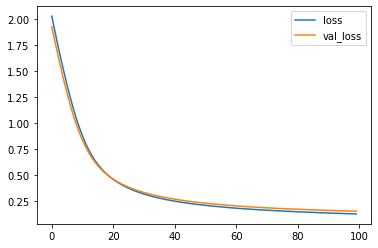

In [11]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label = "loss")
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

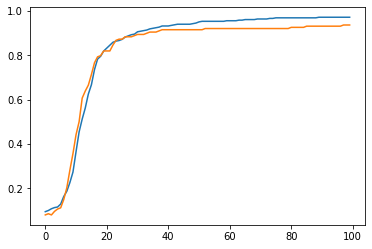

In [14]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')